# cifar10 데이터 분류

In [1]:
# CNN - 특징맵(feature map)을 만들고 압축함
# 특징맵이 많으면 train dataset에만 최적화되어 과적합이 일어남

In [2]:
# 데이터 증강이 중요

In [4]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [26]:
train_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10',
    train=True,
    download=True,
    transform=ToTensor()

    )

test_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10',
    train=False,
    download=True,
    transform=ToTensor()

    )

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
train_data.data.shape

(50000, 32, 32, 3)

In [11]:
test_data.data.shape

(10000, 32, 32, 3)

# CNN 3대장

In [12]:
# lenet 필터 => 5x5
# vgg 부터는 filert 3x3
# resnet 은 깊이가 매우 깊어짐 (하드웨어 성능 향상)
# inception

# 단 모델 사이즈가 커져 적절한 사이즈의 모델을 활용하는 것이 중요

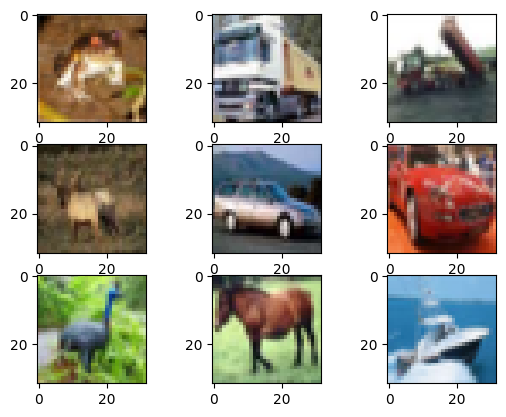

In [13]:
for temp in range(9):
  plt.subplot(3,3,temp+1)
  plt.imshow(train_data.data[temp])

# 데이터 증강

In [14]:
# 1. 회전(Rotation)
# 2. 사이즈 변형(큰<->작,큰이미지의 일부분 사용)
# 3. 좌우 상하 반전
# 4. 이동(이미지의 이동, 모델은 다르다고 판단함)
# 5. crop(전체 큰 이미지를 잘라서 사용)


# transform Compose에 증강 함수가 있음

In [54]:
from torchvision.transforms.transforms import RandomCrop
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip,RandomCrop
import torchvision.transforms as T
# RandomCrop : 랜덤하게 잘라줌

test_transforms = Compose(

    [
        # PIL 이미지로 만듬
        T.ToPILImage(),
        # 랜덤하게 자름
        RandomCrop((32,32),padding=4),
        # 0.5의 확률로 반전
        RandomHorizontalFlip(p=0.5)

    ]

)

In [55]:
train_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/train',
    train=True,
    download=True,
    transform=test_transforms

    )

test_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/test',
    train=False,
    download=True,
    transform=test_transforms

    )

Files already downloaded and verified
Files already downloaded and verified


In [56]:
train_data.data.shape

(50000, 32, 32, 3)

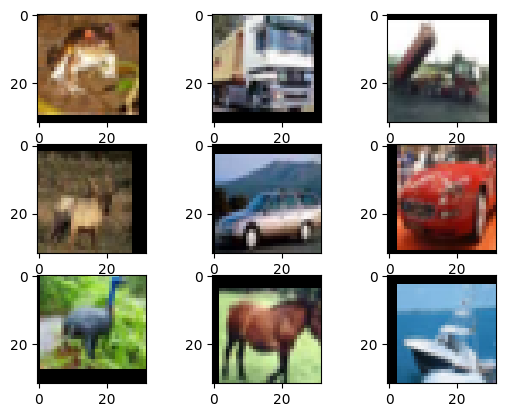

In [59]:
# train_data = test_transforms(train_data.data[:])

for temp in range(9):
  plt.subplot(3,3,temp+1)
  plt.imshow(test_transforms(train_data.data[temp]))

# random seed 바꾸기

In [21]:
import torch
import numpy as np

torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.cuda.manual_seed_all(100)

np.random.seed(100)

In [60]:
# tmp_data = test_transforms(train_data.data)
# tmp_data

ValueError: ignored

In [62]:
train_data.data.shape

(50000, 32, 32, 3)

# 이미지 정규화

In [64]:
# 빨간 차가 있다고 한다면 R G B 중 R의 높은 값들의 빈도가 많음

In [94]:
test_transforms = Compose(

    [
        # PIL 이미지로 만듬
        T.ToPILImage(),
        # 랜덤하게 자름
        RandomCrop((32,32),padding=4),
        # 0.5의 확률로 반전
        RandomHorizontalFlip(p=0.5),
        # 다시 텐서로 바꿈
        T.ToTensor(),
        # 정규화 (전체 이미지의 평균, 편차를 구해서 넣어야함)
        T.Normalize(mean=(0.4914,0.4822,0.4465),std=(0.247,0.243,0.261)),
        # 다시 PIL
        T.ToPILImage()

    ]

)

In [95]:
train_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/train',
    train=True,
    download=True,
    transform=test_transforms

    )

test_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/test',
    train=False,
    download=True,
    transform=test_transforms

    )

Files already downloaded and verified
Files already downloaded and verified


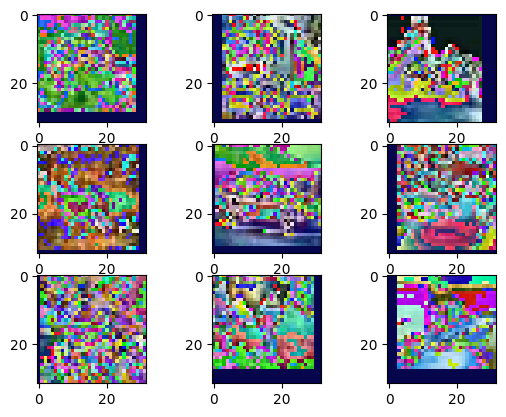

In [96]:
for temp in range(9):
  plt.subplot(3,3,temp+1)
  plt.imshow(test_transforms(train_data.data[temp]))

In [97]:
train_data.data.shape

(50000, 32, 32, 3)

# 전체 이미지 평균, 편차 구하기

In [98]:
train_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/train',
    train=True,
    download=True,
    transform=ToTensor()

    )

test_data = CIFAR10(

    root='/content/drive/MyDrive/메타버스_아카데미_2기/딥러닝/6월/CIFAR10/test',
    train=False,
    download=True,
    transform=ToTensor()

    )

Files already downloaded and verified
Files already downloaded and verified


In [99]:
import torch

imgs = []

for tmp in train_data:
  # tmp[0] == data
  imgs.append(tmp[0])

# torch.stack 쓰는 이유
# 현재 tensor
# 하나로 통합시킴
imgs = torch.stack(imgs,dim=0).numpy()
print(imgs.shape)
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()

mean_r, mean_g,mean_b

(50000, 3, 32, 32)


(0.49139968, 0.48215827, 0.44653124)

In [100]:
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()

std_r, std_g, std_b

(0.24703233, 0.24348505, 0.26158768)

# torch.cat vs torch.stack

In [101]:
t1 = torch.tensor([[1, 2],
                   [3, 4]])
t2 = torch.tensor([[5, 6],
                   [7, 8]])

In [105]:
print(t1.size())
cat0 = torch.cat((t1, t2), dim=0) # dim=0인 경우
cat0 , cat0.size()

torch.Size([2, 2])


(tensor([[1, 2],
         [3, 4],
         [5, 6],
         [7, 8]]),
 torch.Size([4, 2]))

In [106]:
print(t1.size())
cat1 = torch.cat((t1, t2), dim=1) # dim=0인 경우
cat1 , cat1.size()

torch.Size([2, 2])


(tensor([[1, 2, 5, 6],
         [3, 4, 7, 8]]),
 torch.Size([2, 4]))

In [107]:
print(t1.size())
stack = torch.stack((t1, t2))
stack , stack.size()

torch.Size([2, 2])


(tensor([[[1, 2],
          [3, 4]],
 
         [[5, 6],
          [7, 8]]]),
 torch.Size([2, 2, 2]))

# VGG 모델 아키텍쳐

In [ ]:
# conv - maxpooling - fully connected
# 3x3 filter